# **OIL PIPELINE ACCIDENT**

The present dataset was taken from [Kaggle](https://www.kaggle.com/usdot/pipeline-accidents). The data contains reported characteristics of oil accidents ocurred in different places around USA. 

The idea in to perform an Exploratory Data Analysis over the data in order to understand the main aspects related with the data.

In [18]:
## libraries
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import MarkerCluster

### **Loading the Data**

In [19]:
## loading the data
oil_accidents_data = pd.read_csv('database.csv')
oil_accidents_data.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


### **Formatting the dataset**

Let's see the type values contain in each columns and the number of missing data.

In [20]:
## info function
oil_accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

* There are 2795 rows and 48 columns in the database. However, some of those columns have less than half of the data, so the first thing to do is to drop those columns instead of replacing the NaN values by an aleatory and maybe incorrect value. Columns with more than 30% of missing values will be removed as well.
* We'll not remove the NaN values from the rest of columns since there is the possibility to drop valuable data. 

In [21]:
## columns
oil_accidents_data.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [22]:
### removing columns
oil_accidents_data = oil_accidents_data.drop(['Liquid Subtype', 'Liquid Name', 'Shutdown Date/Time',
       'Restart Date/Time', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All Fatalities', 'Intentional Release (Barrels)', 'Public Evacuations'], axis=1)

  
## remaininf data set
print(oil_accidents_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 30 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783 non-null object
Accident Latitude                       2795 non-null float64
Accident Longitude                      27

* ##### **Date**

In [23]:
## Getting the hour, day of week, month and year separately
import datetime
oil_accidents_data['Hour'] = pd.DatetimeIndex(oil_accidents_data['Accident Date/Time']).hour
oil_accidents_data['Day'] = pd.DatetimeIndex(oil_accidents_data['Accident Date/Time']).day_name()
oil_accidents_data['Month'] = pd.DatetimeIndex(oil_accidents_data['Accident Date/Time']).month
oil_accidents_data['Year'] = pd.DatetimeIndex(oil_accidents_data['Accident Date/Time']).year

## data
oil_accidents_data.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Hour,Day,Month,Year
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,1517.0,0.0,0.0,0.0,0.0,1627,7,Friday,1,2010
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,8.0,0.0,0.0,0.0,0.0,4008,8,Monday,1,2010
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,200.0,0.0,0.0,0.0,0.0,200,10,Tuesday,1,2010
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,40.0,0.0,11300.0,0.0,0.0,11540,19,Wednesday,1,2010
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,150.0,0.0,7500.0,2000.0,0.0,29650,13,Thursday,1,2010


### **Visualizing the Data**

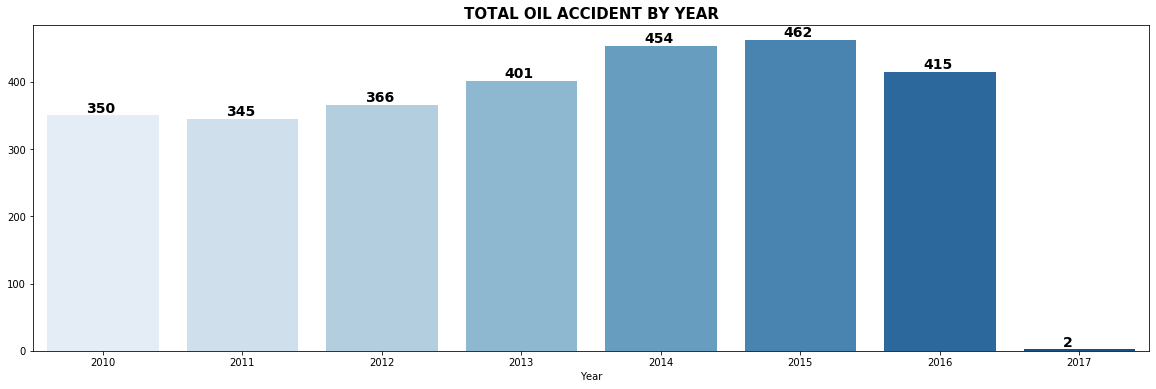

In [24]:
## Total accidents by year.

plt.figure(figsize=(20,6))
ax1 = sns.countplot(x='Year', data=oil_accidents_data, palette='Blues')
ax1.axes.get_xaxis().set_visible(True)
ax1.set_title('TOTAL OIL ACCIDENT BY YEAR', fontsize=15, weight = 'bold')
ax1.set_ylabel('')


for p in ax1.patches:
     ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.35*p.get_width(), p.get_height()+5), weight = 'bold', size=14)


Text(0.5, 1, 'ACCIDENTS COUNT BY MONTH AND YEAR')

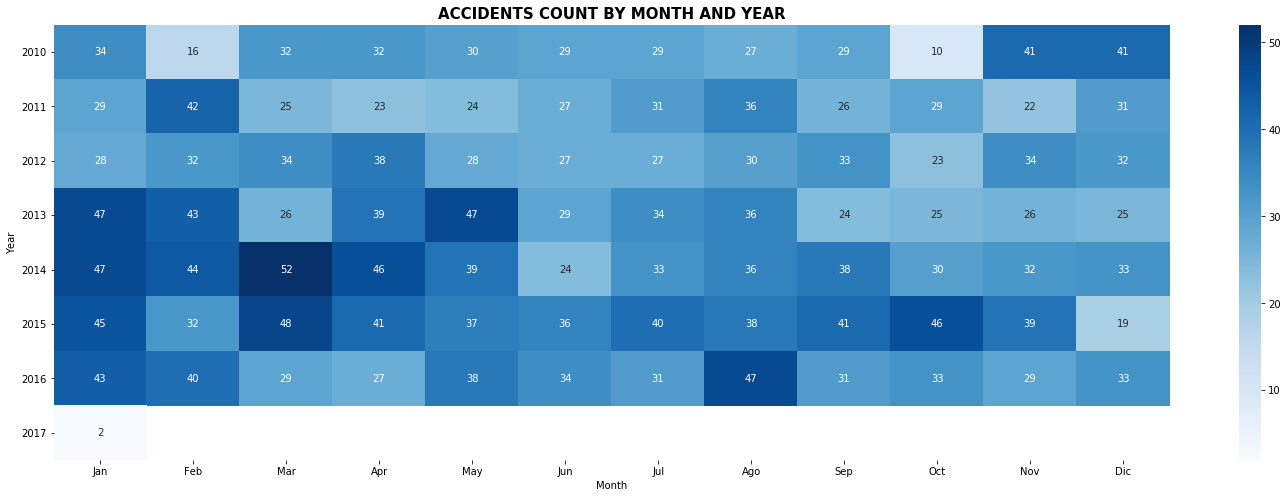

In [25]:
### HEATMAP ACCIDENTS BY YEAR AND MONTH

## Let's count the amount incidents per month and year
table1 = oil_accidents_data.groupby(["Year", "Month"]).size().reset_index(name='Operator Name')

### creating a table with the results
table2 = table1.pivot(index='Year', columns='Month', values='Operator Name')

## label
x_axis_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']


##heatmap
plt.figure(figsize=(25,8))
ax = sns.heatmap(table2, annot=True, annot_kws={"size": 10}, xticklabels=x_axis_labels, cmap="Blues")
[items.set_rotation(0) for items in ax.get_yticklabels()] ## rotating y axes
ax.set_ylim([8, 0])
ax.set_title('ACCIDENTS COUNT BY MONTH AND YEAR', fontsize=15, weight='bold')

* The year with most occurences was 2015, while 2017 has the least amount of accident with 2 because in this year we just have records for the firt days of January. 
* The month with the highest amount of accidents was March/2014.

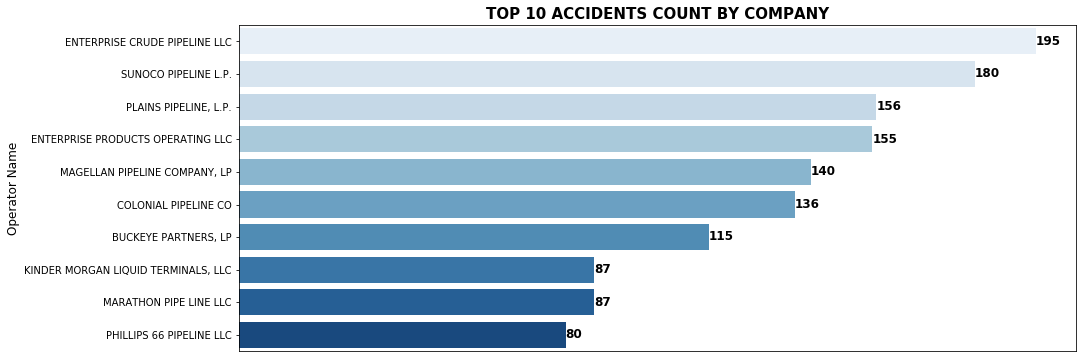

In [26]:
## TOP 10 ACCIDENTS COUNT BY COMPANY
## Let's count the amount of incidents
plt.figure(figsize=(15,6))
table1 = oil_accidents_data.groupby(["Operator Name"]).size().reset_index(name='Operator ID')
table1 = table1.sort_values(by=['Operator ID'], ascending=False)
table1 = table1.head(10)

### Plotting the crime distriibution over the period of study
ax1 = sns.barplot(y='Operator Name', x='Operator ID', data=table1, palette='Blues')

## axes
ax1.axes.get_xaxis().set_visible(False)
ax1.set_title('TOP 10 ACCIDENTS COUNT BY COMPANY', fontsize=15, weight = 'bold')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Operator Name', fontsize=12)

for p in ax1.patches:
     ax1.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+p.get_height()-0.3), weight = 'bold', size=12)



* ENTERPRISE CRUDE PIPELINE LLC presented the higesth amount of accidents among the companies contained in the dataset with 195 cases, followed by Sunoco Pipeline L.P.

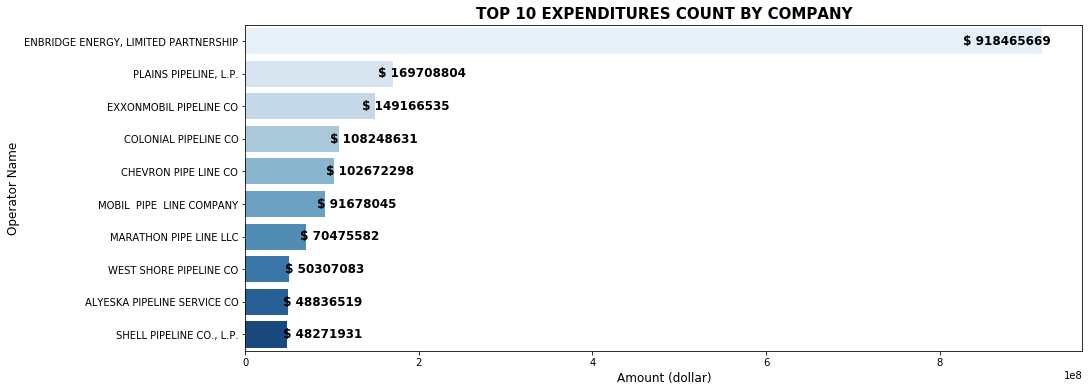

In [27]:
## TOP 10 EXPENDITURES COUNT BY COMPANY

plt.figure(figsize=(15,6))
table2 = oil_accidents_data.groupby('Operator Name')[['All Costs']].agg('sum')
table2 = table2.sort_values(by=['All Costs'], ascending=False)
table2 = table2.head(10)

### Plotting 
ax2 = sns.barplot(y=table2.index, x='All Costs', data=table2, palette='Blues')

## axes
ax2.axes.get_xaxis().set_visible(True)
ax2.set_title('TOP 10 EXPENDITURES COUNT BY COMPANY', fontsize=15, weight = 'bold')
ax2.set_xlabel('Amount (dollar)', fontsize=12)
ax2.set_ylabel('Operator Name', fontsize=12)

for p in ax2.patches:
     ax2.annotate('$ {:.0f}'.format(p.get_width()), (p.get_x()+0.9*p.get_width(), p.get_y()+p.get_height()-0.3), weight = 'bold', size=12)

        

* ENBRIDGE ENERGY, LIMITED PARTNERSHIP spent the higest amount of money over the period of study for solving the problems generated by the accidents. 
* Note that this company is not among the Top 10 companies with highest amount of accidents.
* It is interesting to compare this company with the ENTERPRISE CRUDE PIPELINE LLC.

While studying ENBRIDGE ENERGY, LIMITED PARTNERSHIP we found that this company had to pay $ 804,526,118 in 2010 due to an oil spill occured in Marshall, Texas, USA. 

The distribution of expenditures of this company by city is as follow:

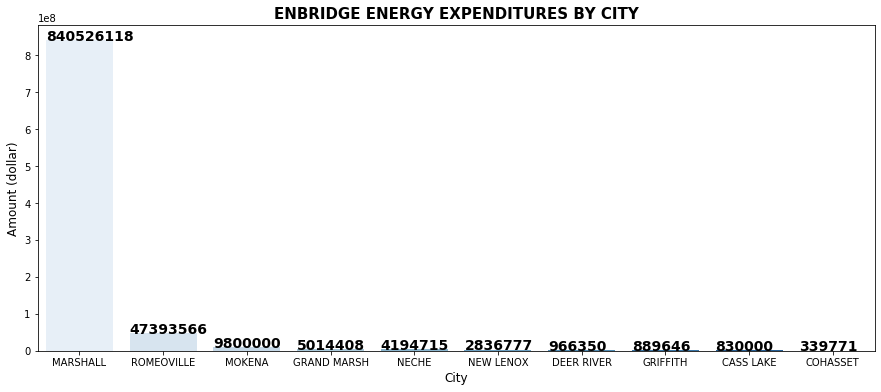

In [28]:
### ENBRIDGE - CITIES EXPENDITURES

## filtering by the operator
enbridge_tab = oil_accidents_data.loc[oil_accidents_data['Operator Name'].isin(['ENBRIDGE ENERGY, LIMITED PARTNERSHIP'])]
table2 = enbridge_tab[['Accident City', 'All Costs']].sort_values(by=['All Costs'], ascending=False)
table2 = table2.head(11)

### plot
plt.figure(figsize=(15,6))

### Plotting 
ax2 = sns.barplot(x='Accident City', y='All Costs', data=table2, palette='Blues')

## axes
ax2.axes.get_xaxis().set_visible(True)
ax2.set_title('ENBRIDGE ENERGY EXPENDITURES BY CITY', fontsize=15, weight = 'bold')
ax2.set_xlabel('City', fontsize=12)
ax2.set_ylabel('Amount (dollar)', fontsize=12)

for p in ax2.patches:
     ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+5), weight = 'bold', size=14)



As we see, the different between the amount of money spent in Marshall and the following city (Romeoville) is quite high. As a sake of comparison we will plot the same graph for ENTERPRISE CRUDE PIPELINE LLC. 

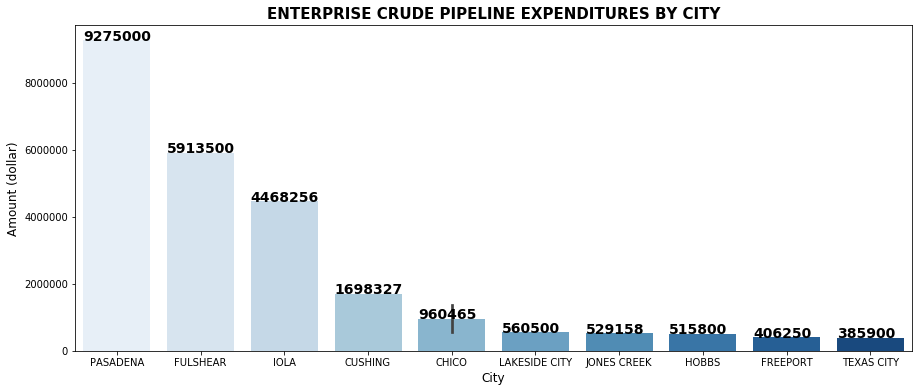

In [29]:
### ENTERPRISE CRUDE PIPELINE - CITIES EXPENDITURES

## filtering by the operator
enterprise_tab = oil_accidents_data.loc[oil_accidents_data['Operator Name'].isin(['ENTERPRISE CRUDE PIPELINE LLC'])]
table2 = enterprise_tab[['Accident City', 'All Costs']].sort_values(by=['All Costs'], ascending=False)
table2 = table2.head(11)

### plot
plt.figure(figsize=(15,6))

### Plotting 
ax2 = sns.barplot(x='Accident City', y='All Costs', data=table2, palette='Blues')

## axes
ax2.axes.get_xaxis().set_visible(True)
ax2.set_title('ENTERPRISE CRUDE PIPELINE EXPENDITURES BY CITY', fontsize=15, weight = 'bold')
ax2.set_xlabel('City', fontsize=12)
ax2.set_ylabel('Amount (dollar)', fontsize=12)

for p in ax2.patches:
     ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+5), weight = 'bold', size=14)


* Although ENTERPRISE CRUDE PIPELINE presented most than double of accidents compared with ENBRIDGE ENERGY, the charges it received for them were much lower. 

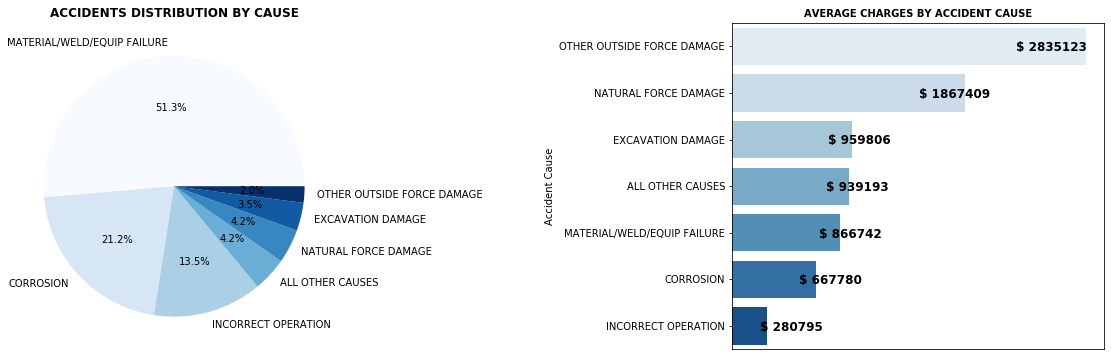

In [30]:
figs, [axes1, axes2] = plt.subplots(1, 2, figsize=(20,6))
plt.subplots_adjust(wspace = 1)

### ACCIDENT CAUSE DISTRIBUTION
ax1 = (oil_accidents_data['Cause Category'].value_counts()*100/len(oil_accidents_data)).plot.pie(autopct='%.1f%%', ax=axes1, figsize=(20,6), cmap='Blues')
ax1.set_ylabel('')
ax1.set_title('ACCIDENTS DISTRIBUTION BY CAUSE', fontsize=12, weight = 'bold')


### ACCIDENT CAUSE AV PRICE

## Let's count the amount of incidents
table2 = oil_accidents_data.groupby('Cause Category')[['All Costs']].agg('mean')
table2 = table2.sort_values(by=['All Costs'], ascending=False)

### Plotting 
ax2 = sns.barplot(y=table2.index, x='All Costs', data=table2, palette='Blues', ax=axes2)

## axes
ax2.axes.get_xaxis().set_visible(False)
ax2.set_title('AVERAGE CHARGES BY ACCIDENT CAUSE', fontsize=10, weight = 'bold')
ax2.set_ylabel('Accident Cause', fontsize=10)

for p in ax2.patches:
     ax2.annotate('$ {:.0f}'.format(p.get_width()), (p.get_x()+0.8*p.get_width(), p.get_y()+p.get_height()-0.3), weight = 'bold', size=12)

* Most of the accidents were caused by *MATERIAL/WELD/EQUIP FAILURE* followe by *CORROSION* and so on until *OTHER OUSDIDE FORCE DAMAGE*. 
* The last one has the highest average cost, indicating that this type of damage may cause high fluid loss.
* Damages caused by natural forces are quite rare compared with the other.

Text(0.5, 1.0, 'Distribution of Net Loss')

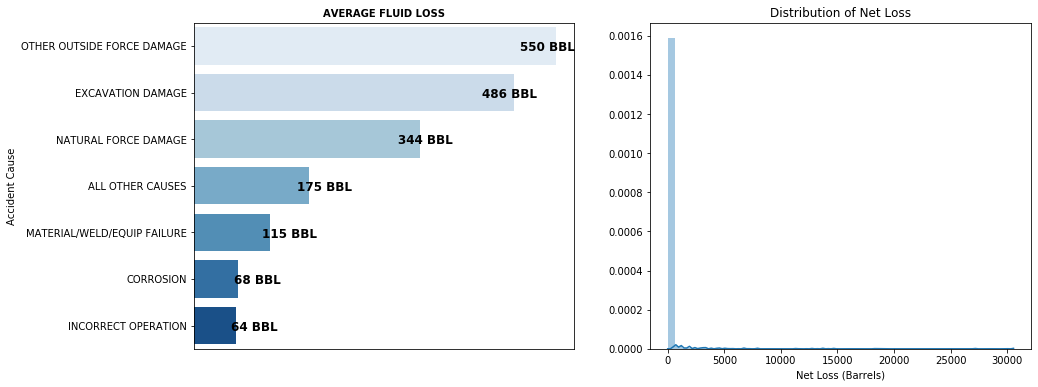

In [31]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

### AVERAGE OIL LOSS BY ACCIDENT CAUSE
table2 = oil_accidents_data.groupby('Cause Category')[['Net Loss (Barrels)']].agg('mean')
table2 = table2.sort_values(by=['Net Loss (Barrels)'], ascending=False)

### Plotting 
sns.barplot(y=table2.index, x='Net Loss (Barrels)', data=table2, palette='Blues', ax=axes1)

## axes
axes1.axes.get_xaxis().set_visible(False)
axes1.set_title('AVERAGE FLUID LOSS', fontsize=10, weight = 'bold')
axes1.set_ylabel('Accident Cause', fontsize=10)

for p in axes1.patches:
     axes1.annotate('{:.0f} BBL'.format(p.get_width()), (p.get_x()+0.9*p.get_width(), p.get_y()+p.get_height()-0.3), weight = 'bold', size=12)


## histogram
sns.distplot(oil_accidents_data['Net Loss (Barrels)'], ax=axes2)
axes2.set_title('Distribution of Net Loss')

* As we said, *OTHER OUTSIDE FORCE DAMAGE* tend to cause high fluid loss. 
* In general, the 'average fluid loss' caused by each 'accident cause' is consistent with the 'average charges'.
* Most of the accidents tend to cause low fluid loss as we see in the Histogram. 

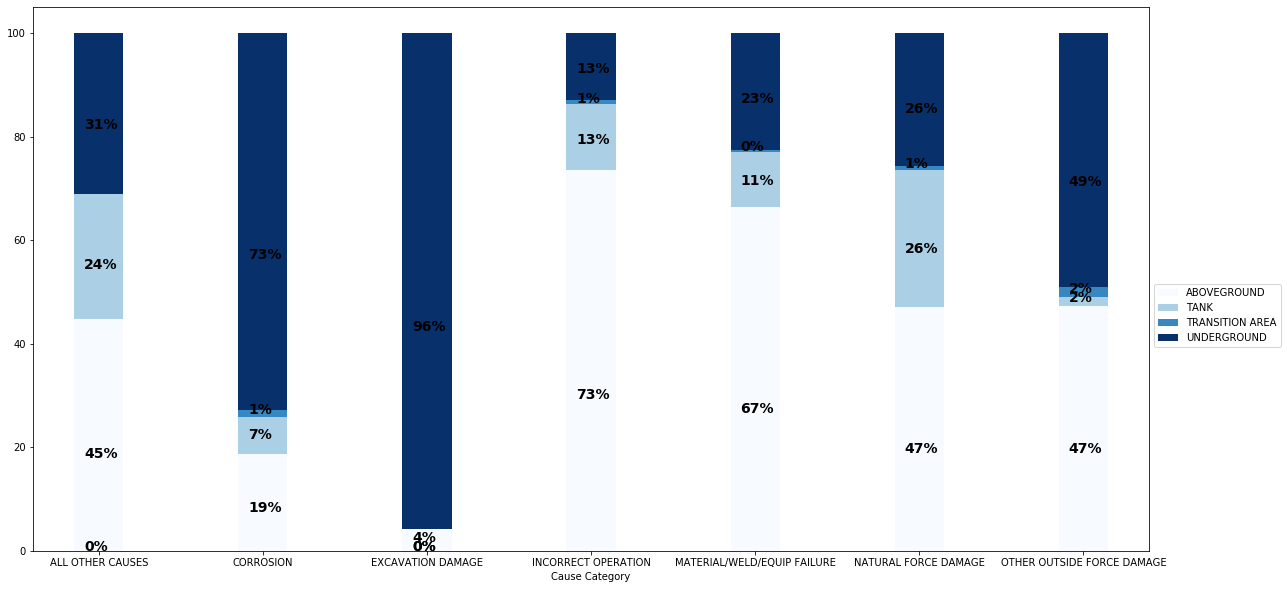

In [32]:
### ACCIDENT CAUSE VS PIPELINE TYPE

cause_pipe = oil_accidents_data.groupby(['Cause Category','Pipeline Type']).size().unstack()
ax = (cause_pipe.T*100/cause_pipe.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, cmap='Blues', figsize=(20,10))
legend_x = 1
legend_y = 0.5
plt.legend(bbox_to_anchor=(legend_x, legend_y))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.2*width, p.get_y()+.4*height),
                  size = 14, weight='bold')  


* There are almost no accidents in the Tanks. The places where most of the accidents ocurred are Aboveground and Underground.

### **LOCATION OF THE ACCIDENTS**

Let's plot the accidents ocurred over the period of study in map.

In [33]:
## obtaining a reference point of Baltimore using Geocode function
from geopandas.tools import geocode

ref_point = geocode("United States", provider="nominatim")
ref_point

,geometry,address
0,POINT (-100.44588 39.78373),United States


In [34]:
## CREATING THE MAP

## MAP
oil_map = folium.Map(location=[39.78373, -100.44588], tiles='openstreetmap', zoom_start=13)


# Add points to the map
mc = MarkerCluster()
for idx, row in oil_accidents_data.iterrows():
    mc.add_child(Marker([row['Accident Latitude'], row['Accident Longitude']], popup=row['Operator Name']))

oil_map.add_child(mc)    
    

# Display the map
oil_map